## Phil's Evaluation on Current Loot Tables and the Scavenger Perk

In [1]:
# Import packages we will be using

import pandas as pd # For dataframe object
import numpy as np # For quick calculations with arrays
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For nicer looking plots

In [2]:
# Import the data set

df = pd.read_excel("Case Study - Data.xlsx", sheet_name=0)

print(df.head(10)) # Print out the header so we can visually validate this is the data we wanted to import

        Date                 Time  ClientVersion  \
0 2014-01-15  1899-12-30 00:00:00          609.0   
1 2014-01-15  1899-12-30 00:00:00          608.0   
2 2014-01-16  1899-12-30 00:00:00          609.0   
3 2014-01-15             00:00:01          609.0   
4 2014-01-16             00:00:01          609.0   
5 2014-01-17             00:00:01          609.0   
6 2014-01-15             00:00:02          609.0   
7 2014-01-16             00:00:02          609.0   
8 2014-01-16             00:00:02          609.0   
9 2014-01-16             00:00:02          609.0   

                                       deviceid      source      subtype  \
0  WmYwr5cbf2aNOromC+b3l1KHQrXTLs1uIEubaYRtuFs=  LootPickup  RegularDrop   
1  +J7UFIHf9EFwL5vs6KKYmjBB4eAWjKq7e7XUkBH8Fd4=  LootPickup  RegularDrop   
2  7A7V8Btso0LEkgm1qEMAIu0GP3HN30g5yJHb5TrKawo=  LootPickup  RegularDrop   
3  HRaMxumgDLOMFEm8vQdmDvZ8wWUrhd/QR1FtIweCfnI=  LootPickup  RegularDrop   
4  0zoNcE5YJB149F2mxydMBZJeohlW9mfPY0laF3p4hNY=

<font size="3">Looks like the data imported correctly! Let's get some basic information about this data set.</font>

In [3]:
# Get some information about the column names, data type, number of NaN values, etc.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727398 entries, 0 to 727397
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           284135 non-null  datetime64[ns]
 1   Time           284135 non-null  object        
 2   ClientVersion  284135 non-null  float64       
 3   deviceid       284041 non-null  object        
 4   source         284135 non-null  object        
 5   subtype        284122 non-null  object        
 6   ItemWorth      284135 non-null  float64       
 7   TotalCoins     284135 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 44.4+ MB
None


<font size="3">Columns appear to have been imported with the Dtype we were expecting. Seems like we have some missing data in a few of the columns. Not so much that is will impead our analysis.</font>

In [4]:
# Get some basic high-level information about the vlaues in our columns

print(df.describe())

       ClientVersion       ItemWorth    TotalCoins
count  284135.000000   284135.000000  2.841350e+05
mean      608.944005    14106.875253  1.219960e+06
std         1.238482    33849.331337  1.361011e+07
min       573.000000     1000.000000 -2.147143e+09
25%       609.000000     2500.000000  8.000000e+04
50%       609.000000     5000.000000  2.808000e+05
75%       609.000000    10000.000000  1.160100e+06
max       610.000000  1000000.000000  2.147277e+09


<font size="3">We see a negative value in the TotalCoins column, so we will have to deal with that at some point. Also, the max value for that column seems exceddingly high.</font>

<font size="3">Let's first verify that the drop rate players are experiencing aligns with the given loot tables.</font>

In [5]:
# We'll filter our dataframe into 2, one for regular drops and another for drops when the player had the scavenger perk

df_regular = df[df["subtype"] == "RegularDrop"] # Filter by regular drops
df_scavenger = df[df["subtype"] == "ScavengerDrop"] # Filter by scavenger perk drops

In [7]:
# We'll count the number of occurances for each item class, and then divide by the total number of drops to estimate drop rates

# These lists represent the loot table as defined by the product manager
regular_loot_table = [0.1765, 0.2885, 0.26, 0.1365, 0.0675, 0.0475, 0.02, 0.005]
scavenger_loot_table = [0.0153, 0.20, 0.25, 0.28, 0.18, 0.05, 0.02, 0.004, 0.007]

# Each item class is tied to a item worth, which we'll use to determine the drop type
coin_amount = [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 1000000]
proba_regular = []

# Loop through the item types and compute percent frequency of drop
for i in coin_amount:
    proba = df_regular["ItemWorth"][df_regular["ItemWorth"] == i].count()  / df_regular["ItemWorth"].count()
    proba_regular.append(proba)

# This is a small list, so we'll just print the actual drop rate with the given table and compare
print(proba_regular)
print(regular_loot_table)

[0.057622642054064976, 0.22327420728275146, 0.25350715141368513, 0.24138005686492417, 0.1506884408330567, 0.04928413699539596, 0.0199821034248849, 0.0035937477448872083, 0.0006675133863495317]
[0.1765, 0.2885, 0.26, 0.1365, 0.0675, 0.0475, 0.02, 0.005]


In [8]:
# Do the exact same as above for the drop rate with the scavenger perks

proba_scavenger = []

for i in coin_amount:
    proba = df_scavenger["ItemWorth"][df_scavenger["ItemWorth"] == i].count()  / df_scavenger["ItemWorth"].count()
    proba_scavenger.append(proba)
    
print(proba_scavenger)
print(scavenger_loot_table)

[0.02380269572698595, 0.204473759678807, 0.24691712073415542, 0.28677946659019216, 0.16661887008890164, 0.04932606825351305, 0.018353885861772296, 0.0028677946659019216, 0.0008603383997705764]
[0.0153, 0.2, 0.25, 0.28, 0.18, 0.05, 0.02, 0.004, 0.007]


<font size="3">The loot table for the scavenger perk seems to be correct. However, the drop rates for regular drops is not matching the loot table. Players are getting way less common and slightly less uncommon drops in favor of more rare and ultra drops. This has an immediate affect on player's perception of the scavenger perk. To a player (not making constant calculations) the drop rates for each item class is effectively the same. The quick solution would be to go back and fix the values in the game code for the regular loot table, though player reaction to seeing more common drops could cause an even greater uporoar among the player base.</font>

<font size="3">Let's investigate how important drops are to the overall game economy</font>

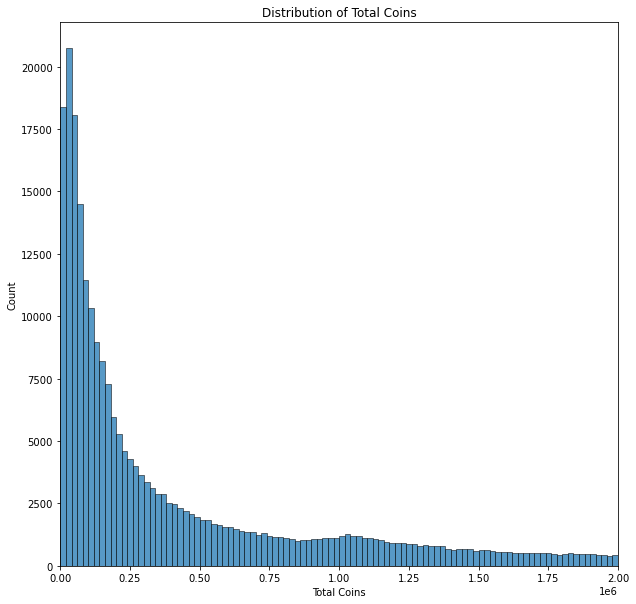

In [9]:
# Plot a histogram, so we can get a since of the distribution of wealth among players

plt.rcParams['figure.figsize'] = 10, 10 # This makes the plot larger
sns.histplot(data=df[(df["TotalCoins"]>0) & (df["TotalCoins"]<=2000000)], x="TotalCoins", bins=100) # We noticed earlier that we need to exclude the min and max values for TotalCoins
plt.xlim(0, 2000000) # This will "zoom" in to a range that is easier to visualize
plt.title("Distribution of Total Coins") # Title for our figure
plt.xlabel("Total Coins") # Always label your axis
plt.ylabel("Count") # Always label your axis
plt.show() # Display the plot

<font size="3">This is a distribution we would expect or at least hope for. Most players are spending their coin, and so have very little. It looks like most players have less than 1 million total coins in their account/bank. Let's get some more concrete stastics on this distribution. We'll do that by comparing total coins to the worth of item drops. The reasoning here is that if player's total worth is similar to an the worth of an item drop, then any singular item drop is impactful to the player.</font>

In [10]:
# Loop through the item worth and calculation the percent of players with that total worth or less

for i in coin_amount:
    percent = df["TotalCoins"][df["TotalCoins"] <= i].count()  / df["TotalCoins"].count() # Calculation
    print(str(percent) + " percent of the player base have less than " + str(i) + " total coins") # Print out results

1.4077815123092897e-05 percent of the player base have less than 1000 total coins
0.0004258539074735601 percent of the player base have less than 2500 total coins
0.004638640083059109 percent of the player base have less than 5000 total coins
0.021704471466028472 percent of the player base have less than 10000 total coins
0.07846974149611981 percent of the player base have less than 25000 total coins
0.16676227849437766 percent of the player base have less than 50000 total coins
0.29088989388846853 percent of the player base have less than 100000 total coins
0.4777447340172805 percent of the player base have less than 250000 total coins
0.7176764566139335 percent of the player base have less than 1000000 total coins


<font size="3">Roughly 28% have more than 1 million total coins. Let's look into that further.</font>

In [11]:
# Loop through values 1 to 10 million

for i in range(1000000, 10000000, 1000000):
    percent = df["TotalCoins"][df["TotalCoins"] <= i].count()  / df["TotalCoins"].count()
    print(str(1-percent) + " percent of the player base have more than " + str(i) + " total coins")

0.28232354338606647 percent of the player base have more than 1000000 total coins
0.1587907156809263 percent of the player base have more than 2000000 total coins
0.10019181023105217 percent of the player base have more than 3000000 total coins
0.06704911397751068 percent of the player base have more than 4000000 total coins
0.04638992028437183 percent of the player base have more than 5000000 total coins
0.032435286043606015 percent of the player base have more than 6000000 total coins
0.02322839495310325 percent of the player base have more than 7000000 total coins
0.017192531719077198 percent of the player base have more than 8000000 total coins
0.01317331550143419 percent of the player base have more than 9000000 total coins


<font size="3">Loot drops are still an important part of the economy. Roughly 70% of the player base have less than 1,000,000 total coins meaning even a single Champion drop has a huge affect on their net worth. This means most players will be engaged anytime there is an item drop. Moreover, only 10% of the player base has more than 3,000,000 total coins which means even drops less than Champion level are still impactful. Only around 1% of the player base has more than 10 million total coins. These players could have an impact if the economy is player-to-player in some manner. However, if the player base is isolated then it is most likely these players are some combination of heavy users or simply don't like to use their coins as often as the average user.</font>

<font size="3">We noticed some issues with the data before we did some analysis. None of it seemed to be a big enough issue to impact the analysis we did above. However, we should take some time to further investigate and ensure the data doesn't have any other irregularities. We don't want to give our stakeholders information and recommendations based on bad data.</font>

In [12]:
# Let's make sure the item worth colum looks good

# We know there should be 9 different item types, plus NaN, so lets look at unique values
unique_item_worth = pd.unique(df["ItemWorth"])

# Looping through unqiue values, we'll count and print them out
for i in unique_item_worth:
    count = df["ItemWorth"][df["ItemWorth"] == i].count()
    print("Number of Items Worth " + str(i) + " :", str(count))

Number of Items Worth 2500.0 : 63310
Number of Items Worth 10000.0 : 68899
Number of Items Worth 5000.0 : 71986
Number of Items Worth 25000.0 : 42927
Number of Items Worth 250000.0 : 1016
Number of Items Worth 1000.0 : 16137
Number of Items Worth 50000.0 : 14003
Number of Items Worth 100000.0 : 5666
Number of Items Worth 1000000.0 : 191
Number of Items Worth nan : 0


<font size="3">The data looks like we would expect. Let's look at the subtype column.</font>

In [13]:
# We'll perform a similar analysis as above

unique_subtype = pd.unique(df["subtype"])

for i in unique_subtype:
    count = df["subtype"][df["subtype"] == i].count()
    print("Number of subtypes " + str(i) + " :", str(count))

Number of subtypes RegularDrop : 277148
Number of subtypes ScavengerDrop : 6974
Number of subtypes nan : 0


<font size="3">Again, this is as we expect. No extra subtypes, and the usage of the scavenger drop perk should be less than the amount of regular drops based on the feedback we are getting from forumns as well as our understanding that players have multiple perks to choose from. Lastly, lets look at the device id column.</font>

In [14]:
# We want to group by unique device id's, and then exame them

# Filter by unique id's
unique_devices = pd.unique(df["deviceid"])
unique_id = df.groupby("deviceid")["ItemWorth"].nunique()

# Print out some summary statistics
print("The number of unique devices is: ", len(unique_devices))
print(unique_id.head(10))
print(unique_id.describe())

The number of unique devices is:  142339
deviceid
+++bEwFjsqId4AkEn561Sifgaw5khYWPkaQSGJOHxEo=    2
+++u4LIdsbLj51+sdVT261zRinmgdSDWTFvPlw1Fmn4=    1
++0r7MbmzDAXh2cR3U7B3P+khU3e3w8Q2NO0VRWNego=    1
++37NnOoHsY4zNTBWYWLSm9WPOQD7YKqSmYgfY9BusU=    1
++5b72lnDd/QpEskB51O6PwnGjvy4y79VdWCCOx6evs=    2
++8Qa5I6qSoy/A2n1GOlGsWoQNQJMetIPq+1wDfHEPI=    1
++8tQMarRJzgEmjFs8Pa2OnFRsAGOUGsHJcY3ywD8Yc=    1
++AXRfxVdezwIpw+OXXVn6q6MfjBc7W+9wwtBbZ2Zhg=    1
++DTmN3DOT9u6KDNb2fECktzGhgII4uvI4ThwGct3dg=    1
++G2B0CpOSnrHaW0x6QPf0TtAWs66Fo01/cLjjHFwfE=    3
Name: ItemWorth, dtype: int64
count    142338.000000
mean          1.630029
std           0.763744
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: ItemWorth, dtype: float64


<font size="3">This looks good! We want lots of unqiue id's to look at in order to ensure a good sample representative of the playerbase.</font>

<font size="3">Data quaility overall is very good. Only in the deviceid and subtype fields is there missing data. The number of NaN's are small so it has little effect on the analysis. There are a few analmolies in the TotalCoin feature. There is one value that is negative, which shouldn't be the case so clearly there is an issue there. Also, the max value for that column is over 2 billion. I would recommend removing that value from the data set for analysis and then letting someone else on the team know so they can investigate what is going on with this particular account.</font>

## Final recommendations

 - Fix the game code so it matches the defined loot table
     - Consider decreasing the drop rate for common and uncommon items in the regular loot table so the change isn't too jarring for players
     - Consider increasing the drop rate for legendary and higher items in the scavenger table to increase player perception in the perk
         - The economy is in a state that could handle more coins entering the market from a subsegment of the player base
 - Drops are still impactful to the game economy, so item worth should stay consistant
 - Investigate the situation that allows for players to have negative total worth
 - Investigate the device id with 2 billion coins